# Geometric Brownian Motion

In [1]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

## Asset Price at given time

Asset prices at time t can be calclauted using the closed form formula  

$$ \Large S_{t} = S_{0} \ e^{(\mu \ - 0.5 \ \sigma^2) \ t \ + \ \sigma \ \epsilon \ \sqrt{t}} $$

In [2]:
S0 = 100  # initial asset price

mu = 0.05  # mean of annual simple return

sigma = 0.25  # standard deviation of annual returns

T = 2.0  # year we want to know the asset price

I = 10000  # number of random draws at end of year 2

# generate 10,000 final asset prices after two years (np.random.standard_normal(I) is an array)

ST = S0 * np.exp((mu - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * np.random.standard_normal(I))

ST

array([102.41597272,  73.60023286,  99.91709248, ..., 122.02643354,
       108.89911445, 102.43849047])

In [3]:
len(ST)

10000

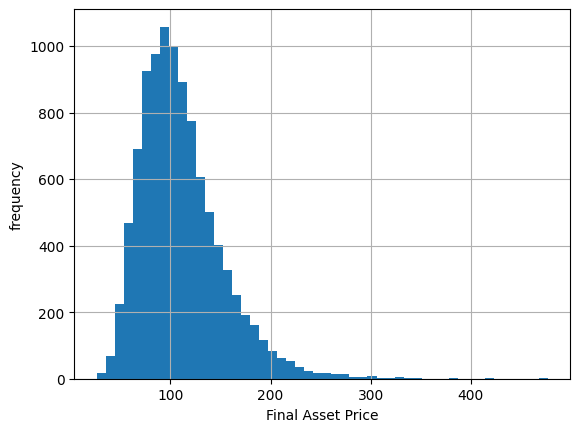

In [4]:
# Plot histogram for all possible prices at the end of year 2

plt.hist(ST, bins=50)

plt.xlabel('Final Asset Price')

plt.ylabel('frequency')

plt.grid(True)

## Statistics of GBM
We use SciPy to get the statistics. <br/> 
Skew and Kurtosis shows the lognormal distribution of prices is not normal

In [5]:
import scipy.stats as st
%time 
sta1 = st.describe(ST)

print("%14s %14.3f" % ('size', sta1[0]))
print("%14s %14.3f" % ('min', sta1[1][0]))
print("%14s %14.3f" % ('max', sta1[1][1]))
print("%14s %14.3f" % ('mean', sta1[2]))
print("%14s %14.3f" % ('std', np.sqrt(sta1[3])))
print("%14s %14.3f" % ('skew', sta1[4]))
print("%14s %14.3f" % ('kurtosis', sta1[5]))

CPU times: total: 0 ns
Wall time: 0 ns
          size      10000.000
           min         26.549
           max        476.976
          mean        110.671
           std         40.970
          skew          1.265
      kurtosis          3.271


We can use NumPy/SciPy functions for some of the stats. They produce the same results as above

In [6]:
print("%14s %14.3f" % ('size', len(ST)))
print("%14s %14.3f" % ('min', np.min(ST)))
print("%14s %14.3f" % ('max', np.max(ST)))
print("%14s %14.3f" % ('mean', np.mean(ST)))
print("%14s %14.3f" % ('std', np.std(ST)))
print("%14s %14.3f" % ('skew', st.skew(ST)))
print("%14s %14.3f" % ('Kurtosis', st.kurtosis(ST)))

          size      10000.000
           min         26.549
           max        476.976
          mean        110.671
           std         40.968
          skew          1.265
      Kurtosis          3.271


## GBM Paths

We use the closed form solution to generate the paths $$ \Large S_{t} = S_{0} \ e^{(\mu \ - 0.5 \ \sigma^2) \ t \ + \ \sigma \ \epsilon \ \sqrt{t}} $$ 

- This is an iterative process since each step is calculated based on the asset price in the previous step 

  $ S_{1} = S_{0} \ e^{(\mu \ - 0.5 \ \sigma^2) \ 1 \ + \ \sigma \ \epsilon \ \sqrt{1}} $ 

  $ S_{2} = S_{1} \ e^{(\mu \ - 0.5 \ \sigma^2) \ 1 \ + \ \sigma \ \epsilon \ \sqrt{1}} = S_{0} \ e^{(\mu \ - 0.5 \ \sigma^2) \ 1 \ + \ \sigma \ \epsilon \ \sqrt{1}} \ e^{(\mu \ - 0.5 \ \sigma^2) \ 1 \ + \ \sigma \ \epsilon \ \sqrt{1}} $ 

  $ S_{3} = S_{2} \ e^{(\mu \ - 0.5 \ \sigma^2) \ 1 \ + \ \sigma \ \epsilon \ \sqrt{1}} = S_{1} \ e^{(\mu \ - 0.5 \ \sigma^2) \ 1 \ + \ \sigma \ \epsilon \ \sqrt{1}}  e^{(\mu \ - 0.5 \ \sigma^2) \ 1 \ + \ \sigma \ \epsilon \ \sqrt{1}} = S_{0} \ e^{(\mu \ - 0.5 \ \sigma^2) \ 1 \ + \ \sigma \ \epsilon \ \sqrt{1}} \ e^{(\mu \ - 0.5 \ \sigma^2) \ 1 \ + \ \sigma \ \epsilon \ \sqrt{1}} \ e^{(\mu \ - 0.5 \ \sigma^2) \ 1 \ + \ \sigma \ \epsilon \ \sqrt{1}} $

  ...

- For every step, the drift part is constant $ (r \ - 0.5 \ \sigma^2) \ dt $

- The only variable that changes is the standard normal $ \epsilon $

In [7]:
# We want the full path (not just the final values)

# number of steps, 1 step per day, 365 days a year
n = 3650

# number of paths
M = 100000

# years to simulate
T = 10 

# each timestep
dt = T / n

# initial asset price
S0 = 100

This is the drift part <Br/>
$ \Large e^{(r \ - 0.5 \ \sigma^2) \ dt} $

In [8]:
drift = (mu - 0.5 * sigma ** 2) * dt 

drift

5.136986301369864e-05

This is the shock part<Br/> $ \large \sigma \ \epsilon \ \sqrt{dt} $

In [9]:
shock_matrix = sigma * np.sqrt(dt) * np.random.standard_normal(size=(n, M))

print(shock_matrix.shape)
print(shock_matrix)

(3650, 100000)
[[ 2.54761396e-02  1.48319997e-02 -1.04135046e-02 ...  2.60368063e-03
  -1.97514864e-02  5.55083633e-03]
 [-1.29688001e-02  5.50312908e-03 -1.36330585e-02 ... -1.16345195e-02
   1.20924121e-02 -3.75935168e-03]
 [-8.92689712e-03 -1.45642061e-02  1.86514868e-02 ...  9.68998224e-03
   1.22809228e-02  1.95101355e-02]
 ...
 [-2.37747169e-02 -1.40263901e-02  3.09656181e-02 ...  3.32738573e-03
   8.63018179e-03  2.02735658e-03]
 [-1.22485795e-02 -3.39633566e-03 -5.11646478e-05 ... -5.17914648e-03
   6.13240161e-03 -5.32208486e-03]
 [-7.42451067e-03  7.59205582e-03 -1.19526810e-02 ... -7.62732818e-04
   5.82812478e-03 -2.84927097e-03]]


The drift and shock combined <Br>
$ \large (r \ - 0.5 \ \sigma^2) \ dt \ + \ \sigma \ \epsilon \ \sqrt{dt} $

In [10]:
drift + shock_matrix

array([[ 2.55275095e-02,  1.48833696e-02, -1.03621347e-02, ...,
         2.65505049e-03, -1.97001166e-02,  5.60220619e-03],
       [-1.29174303e-02,  5.55449895e-03, -1.35816887e-02, ...,
        -1.15831496e-02,  1.21437819e-02, -3.70798182e-03],
       [-8.87552725e-03, -1.45128362e-02,  1.87028567e-02, ...,
         9.74135211e-03,  1.23322927e-02,  1.95615054e-02],
       ...,
       [-2.37233470e-02, -1.39750202e-02,  3.10169880e-02, ...,
         3.37875560e-03,  8.68155166e-03,  2.07872644e-03],
       [-1.21972096e-02, -3.34496579e-03,  2.05215169e-07, ...,
        -5.12777661e-03,  6.18377148e-03, -5.27071500e-03],
       [-7.37314080e-03,  7.64342569e-03, -1.19013111e-02, ...,
        -7.11362955e-04,  5.87949464e-03, -2.79790110e-03]])

Calcluate <br/>
$ \large \ e^{(r \ - 0.5 \ \sigma^2) \ dt \ + \ \sigma \ \epsilon \ \sqrt{dt}} $

In [11]:
B = np.exp(drift + shock_matrix)

B

array([[1.02585613, 1.01499468, 0.98969137, ..., 1.00265858, 0.98049266,
        1.00561793],
       [0.98716564, 1.00556995, 0.98651013, ..., 0.98848368, 1.01221782,
        0.99629888],
       [0.99116374, 0.98559197, 1.01887885, ..., 1.00978895, 1.01240865,
        1.01975409],
       ...,
       [0.97655584, 0.98612218, 1.03150303, ..., 1.00338447, 1.00871935,
        1.00208089],
       [0.98787687, 0.99666062, 1.00000021, ..., 0.99488535, 1.00620293,
        0.99474315],
       [0.99265397, 1.00767271, 0.98816923, ..., 0.99928889, 1.00589681,
        0.99720601]])

add a row of 1 on top of the matrix, since that will be the original price at t=0

In [12]:
D = np.vstack([np.ones(M), B])

print(D.shape)
print(D)            

(3651, 100000)
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.02585613 1.01499468 0.98969137 ... 1.00265858 0.98049266 1.00561793]
 [0.98716564 1.00556995 0.98651013 ... 0.98848368 1.01221782 0.99629888]
 ...
 [0.97655584 0.98612218 1.03150303 ... 1.00338447 1.00871935 1.00208089]
 [0.98787687 0.99666062 1.00000021 ... 0.99488535 1.00620293 0.99474315]
 [0.99265397 1.00767271 0.98816923 ... 0.99928889 1.00589681 0.99720601]]


to obtain the cumulative return, multiply each row by the next

In [13]:
S = S0 * D.cumprod(axis=0)

print(S.shape)
print(S) 

(3651, 100000)
[[100.         100.         100.         ... 100.         100.
  100.        ]
 [102.58561266 101.49946784  98.96913673 ... 100.26585783  98.04926627
  100.56179279]
 [101.26899215 102.06481519  97.63405558 ...  99.1111638   99.24721427
  100.18960195]
 ...
 [ 50.86392956  34.71693926 261.3644573  ... 108.25099989  60.2293774
  116.8758836 ]
 [ 50.24729977  34.60100629 261.36451094 ... 107.69733369  60.60297604
  116.26148471]
 [ 49.87818181  34.86648982 258.27236736 ... 107.62074904  60.96034044
  115.93665121]]


## Plot GBM Paths

In [14]:
# Let's plot these, select a linspace for the time (we add extra row because we added an extra row to original matrix)

time_axis = np.linspace(0, T, n + 1)

print(time_axis)
print(time_axis[365])    # first year
print(time_axis[730])    # second year

[0.00000000e+00 2.73972603e-03 5.47945205e-03 ... 9.99452055e+00
 9.99726027e+00 1.00000000e+01]
1.0
2.0


In [15]:
# but we need the above time for each column of the price matrix (i.e. for each path)

tt = np.full((M, n+1), fill_value = time_axis)

tt = tt.transpose()

tt

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.73972603e-03, 2.73972603e-03, 2.73972603e-03, ...,
        2.73972603e-03, 2.73972603e-03, 2.73972603e-03],
       [5.47945205e-03, 5.47945205e-03, 5.47945205e-03, ...,
        5.47945205e-03, 5.47945205e-03, 5.47945205e-03],
       ...,
       [9.99452055e+00, 9.99452055e+00, 9.99452055e+00, ...,
        9.99452055e+00, 9.99452055e+00, 9.99452055e+00],
       [9.99726027e+00, 9.99726027e+00, 9.99726027e+00, ...,
        9.99726027e+00, 9.99726027e+00, 9.99726027e+00],
       [1.00000000e+01, 1.00000000e+01, 1.00000000e+01, ...,
        1.00000000e+01, 1.00000000e+01, 1.00000000e+01]])

only plot ten paths (for clarity)

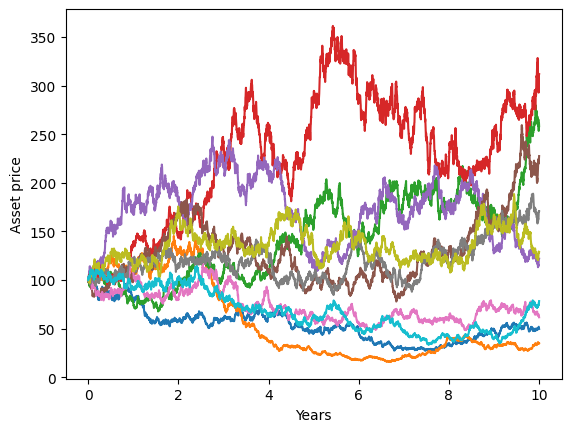

In [16]:
plt.plot(tt[:,:10], S[:,:10])

plt.xlabel("Years")

plt.ylabel("Asset price")

plt.show()

## Statistical Results

Let's get statistical results for each of the years.

Each year is represented by a row in the asset price matrix. 

3,650 rows means that every 365 rows corresponds to a year.

The mean of lognormal distributions (average stock price) is given by $$ \Large E(S_{t}) = S_{0} \ e^{\mu t} \ \ \ $$  (where $ \mu $ is the annual mean simple returns)  

The standard deviation of lognormal distribution is given by $$ \Large \sigma = S_{0} \ e^{\mu t} \sqrt{(e^{\sigma^{2}t} - 1)} \ \ \ $$  (where $ \mu $ is the annual mean simple returns and $ \sigma $ is the annual standard deviation of simple returns)  

so :

for year 1, $ E(S_{1}) = 100 \ e^{0.05 \ * \ 1} = 105.127 $

for year 2, $ E(S_{2}) = 100 \ e^{0.05 \ * \ 2} = 110.517 $

for year 3, $ E(S_{3}) = 100 \ e^{0.05 \ * \ 3} = 116.183 $

etc...

similarly :

for year 1, $ \sigma_{1} = 26.698 $

for year 2, $ \sigma_{2} = 40.327 $

for year 3, $ \sigma_{3} = 52.762 $

etc...

Let's compare these two formulas with our simulation results.

In [17]:
print ("For year 1\n")

year1_mean = np.mean(S[365])

print("%14s %14.3f" % ('   data stock price mean', year1_mean))
print('%14s %14.3f' % ('formula stock price mean', S0*np.exp(mu*1)))

year1_std = np.std(S[365])
print("%14s %14.3f" % ('                data std', year1_std))
print("%14s %14.3f" % ('             formula std', S0*np.exp(mu*1)*np.sqrt(np.exp(1*(sigma)**2) -1)))

print ("\nFor year 2\n")

year2_mean = np.mean(S[730])

print("%14s %14.3f" % ('   data stock price mean', year2_mean))
print('%14s %14.3f' % ('formula stock price mean', S0*np.exp(mu*2)))

year2_std = np.std(S[730])
print("%14s %14.3f" % ('                data std', year2_std))
print("%14s %14.3f" % ('             formula std', S0*np.exp(mu*2)*np.sqrt(np.exp(2*(sigma)**2) -1)))

print ("\nFor year 3\n")

year3_mean = np.mean(S[1095])
print("%14s %14.3f" % ('   data stock price mean', year3_mean))
print('%14s %14.3f' % ('formula stock price mean', S0*np.exp(mu*3)))

year3_std = np.std(S[1095])
print("%14s %14.3f" % ('                data std', year3_std))
print("%14s %14.3f" % ('             formula std', S0*np.exp(mu*3)*np.sqrt(np.exp(3*(sigma)**2) -1)))

print ("\nFor year 4\n")

year4_mean = np.mean(S[1460])
print("%14s %14.3f" % ('   data stock price mean', year4_mean))
print('%14s %14.3f' % ('formula stock price mean', S0*np.exp(mu*4)))

year4_std = np.std(S[1460])
print("%14s %14.3f" % ('                     std', year4_std))
print("%14s %14.3f" % ('             formula std', S0*np.exp(mu*4)*np.sqrt(np.exp(4*(sigma)**2) -1)))

print ("\nFor year 5\n")

year5_mean = np.mean(S[1825])
print("%14s %14.3f" % ('   data stock price mean', year5_mean))
print('%14s %14.3f' % ('formula stock price mean', S0*np.exp(mu*5)))

year5_std = np.std(S[1925])
print("%14s %14.3f" % ('                     std', year5_std))
print("%14s %14.3f" % ('             formula std', S0*np.exp(mu*5)*np.sqrt(np.exp(5*(sigma)**2) -1)))

print ("\nFor year 6\n")

year6_mean = np.mean(S[2190])
print("%14s %14.3f" % ('   data stock price mean', year6_mean))
print('%14s %14.3f' % ('formula stock price mean', S0*np.exp(mu*6)))

year6_std = np.std(S[2190])
print("%14s %14.3f" % ('                     std', year6_std))
print("%14s %14.3f" % ('             formula std', S0*np.exp(mu*6)*np.sqrt(np.exp(6*(sigma)**2) -1)))

print ("\nFor year 7\n")

year7_mean = np.mean(S[2555])
print("%14s %14.3f" % ('   data stock price mean', year7_mean))
print('%14s %14.3f' % ('formula stock price mean', S0*np.exp(mu*7)))

year7_std = np.std(S[2555])
print("%14s %14.3f" % ('                     std', year7_std))
print("%14s %14.3f" % ('             formula std', S0*np.exp(mu*7)*np.sqrt(np.exp(7*(sigma)**2) -1)))

print ("\nFor year 8\n")

year8_mean = np.mean(S[2920])
print("%14s %14.3f" % ('   data stock price mean', year8_mean))
print('%14s %14.3f' % ('formula stock price mean', S0*np.exp(mu*8)))

year8_std = np.std(S[2920])
print("%14s %14.3f" % ('                     std', year8_std))
print("%14s %14.3f" % ('             formula std', S0*np.exp(mu*8)*np.sqrt(np.exp(8*(sigma)**2) -1)))

print ("\nFor year 9\n")

year9_mean = np.mean(S[3285])
print("%14s %14.3f" % ('   data stock price mean', year9_mean))
print('%14s %14.3f' % ('formula stock price mean', S0*np.exp(mu*9)))

year9_std = np.std(S[3285])
print("%14s %14.3f" % ('                     std', year9_std))
print("%14s %14.3f" % ('             formula std', S0*np.exp(mu*9)*np.sqrt(np.exp(9*(sigma)**2) -1)))

print ("\nFor year 10\n")

year10_mean = np.mean(S[3650])

print("%14s %14.3f" % ('   data stock price mean', year10_mean))
print('%14s %14.3f' % ('formula stock price mean', S0*np.exp(mu*10)))

year10_std = np.std(S[3650])
print("%14s %14.3f" % ('                     std', year10_std))
print("%14s %14.3f" % ('             formula std', S0*np.exp(mu*10)*np.sqrt(np.exp(10*(sigma)**2) -1)))

For year 1

   data stock price mean        105.087
formula stock price mean        105.127
                data std         26.677
             formula std         26.698

For year 2

   data stock price mean        110.496
formula stock price mean        110.517
                data std         40.523
             formula std         40.327

For year 3

   data stock price mean        115.943
formula stock price mean        116.183
                data std         52.455
             formula std         52.762

For year 4

   data stock price mean        121.623
formula stock price mean        122.140
                     std         64.404
             formula std         65.093

For year 5

   data stock price mean        127.858
formula stock price mean        128.403
                     std         80.615
             formula std         77.770

For year 6

   data stock price mean        134.488
formula stock price mean        134.986
                     std         90.569
   

## Standard Deviation Cones

Let's plot the lognormal mean  $$ \Large E(S_{t}) = S_{0} \ e^{\mu t} $$

and standard deviation  $$ \Large \sigma = S_{0} \ e^{\mu t} \sqrt{(e^{\sigma^{2}t} - 1)} $$

and compare against results with our generated data.

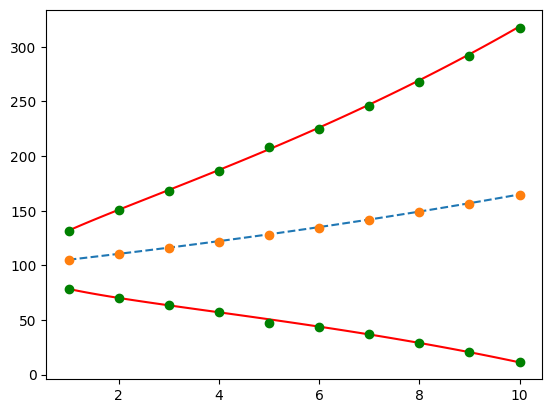

In [18]:
# Let's plot the above fomulas 

t = np.linspace(1, 10, 100)

means_formula = S0 * np.exp(mu*t)

std_formula = S0 * np.exp(mu * t) * np.sqrt(np.exp(t * sigma**2)-1)

plt.plot(t, means_formula, '--')
plt.plot(t, means_formula + std_formula , 'r')
plt.plot(t, means_formula - std_formula, 'r')

# now for the simulation data
years = [1, 2, 3, 4, 5, 6, 7, 8, 9 ,10]
mean_prices = [year1_mean, year2_mean, year3_mean, year4_mean, year5_mean, year6_mean, year7_mean, year8_mean, year9_mean, year10_mean]
std_prices_high = [year1_mean + year1_std, year2_mean + year2_std, year3_mean + year3_std, year4_mean + year4_std, year5_mean + year5_std, year6_mean + year6_std, year7_mean + year7_std, year8_mean + year8_std, year9_mean + year9_std, year10_mean + year10_std]
std_prices_low = [year1_mean - year1_std, year2_mean - year2_std, year3_mean - year3_std, year4_mean - year4_std, year5_mean - year5_std, year6_mean - year6_std, year7_mean - year7_std, year8_mean - year8_std, year9_mean - year9_std, year10_mean - year10_std]

plt.plot(years, mean_prices, 'o')
plt.plot(years, std_prices_high, 'og')
plt.plot(years, std_prices_low, 'og')
plt.show()

### Simple Returns

Simple returns are given by <br> 
$$ \large r = \frac{S_{t} - S_{t-1}}{S_{t}} = \frac{S_{t}}{S_{t-1}} - 1 $$

let's calculate $ S_{t}-S_{t-1} $ using the numpy diff function

In [19]:
diff = np.diff(S, axis=0)

print(diff.shape)
print(diff)

(3650, 100000)
[[ 2.58561266e+00  1.49946784e+00 -1.03086327e+00 ...  2.65857826e-01
  -1.95073373e+00  5.61792789e-01]
 [-1.31662051e+00  5.65347344e-01 -1.33508115e+00 ... -1.15469403e+00
   1.19794800e+00 -3.72190834e-01]
 [-8.94838743e-01 -1.47055318e+00  1.84321875e+00 ...  9.70194575e-01
   1.23152384e+00  1.97915394e+00]
 ...
 [-1.22108955e+00 -4.88575906e-01  7.98230476e+00 ...  3.65136471e-01
   5.20621281e-01  2.42700648e-01]
 [-6.16629783e-01 -1.15932970e-01  5.36359569e-05 ... -5.53666194e-01
   3.73598640e-01 -6.14398889e-01]
 [-3.69117965e-01  2.65483530e-01 -3.09214357e+00 ... -7.65846506e-02
   3.57364405e-01 -3.24833498e-01]]


Remove the last row from the price array (since the previous array also has one less row, the first one)

In [20]:
S1 = S[:-1]

print(S1.shape)
print(S1)

(3650, 100000)
[[100.         100.         100.         ... 100.         100.
  100.        ]
 [102.58561266 101.49946784  98.96913673 ... 100.26585783  98.04926627
  100.56179279]
 [101.26899215 102.06481519  97.63405558 ...  99.1111638   99.24721427
  100.18960195]
 ...
 [ 52.0850191   35.20551516 253.38215254 ... 107.88586341  59.70875612
  116.63318295]
 [ 50.86392956  34.71693926 261.3644573  ... 108.25099989  60.2293774
  116.8758836 ]
 [ 50.24729977  34.60100629 261.36451094 ... 107.69733369  60.60297604
  116.26148471]]


now calculate <br><br>$ \Large r = \frac{S_{t} - S_{t-1}}{S_{t}} $

In [21]:
simple_returns = diff/S1

print(simple_returns.shape)
print(simple_returns)

(3650, 100000)
[[ 2.58561266e-02  1.49946784e-02 -1.03086327e-02 ...  2.65857826e-03
  -1.95073373e-02  5.61792789e-03]
 [-1.28343583e-02  5.56995378e-03 -1.34898737e-02 ... -1.15163232e-02
   1.22178171e-02 -3.70111574e-03]
 [-8.83625603e-03 -1.44080326e-02  1.88788506e-02 ...  9.78895352e-03
   1.24086490e-02  1.97540853e-02]
 ...
 [-2.34441605e-02 -1.38778230e-02  3.15030269e-02 ...  3.38447002e-03
   8.71934562e-03  2.08088849e-03]
 [-1.21231251e-02 -3.33937763e-03  2.05215190e-07 ... -5.11465201e-03
   6.20293046e-03 -5.25684915e-03]
 [-7.34602588e-03  7.67271123e-03 -1.18307706e-02 ... -7.11109996e-04
   5.89681280e-03 -2.79399063e-03]]


## Annual Simple Returns

**np.mean(simple_returns[365])** represents the average of the daily returns of all paths at the one year mark, $ \bar{r}_{d} $, not the annual return (since we are averaging the daily returns, not the annual returns).

To get the annual average return, use the formula $$ \Large \bar{r}_{y} = (1 + \bar{r}_{d})^{365} - 1  $$

To get the annual average standard deviation from the daily standard deviation $$ \Large \sigma_{y} = \sigma_{d} \sqrt{365} $$

Note: at year 1, we should get a mean close to the actual $ \mu = 0.05 $ used in the original GBM

In [22]:
print("\nStats for year 1\n")

print("%14s %14.3f" % ('mean annual simple return', ((1 + np.mean(simple_returns[:365,:]))**365) - 1))
print("%14s %14.3f" % ('        annual std year 1', np.std(simple_returns[:365,:]) * np.sqrt(365)))
print("%14s %14.3f" % ('                     Skew', st.skew(simple_returns[365])))
print("%14s %14.3f" % ('                 Kurtosis', st.kurtosis(simple_returns[365])))

print("\nStats for year 2\n")

print("%14s %14.4f" % ('mean annual simple return', ((1 + np.mean(simple_returns[:730,:]))**730) - 1))
print("%14s %14.3f" % ('        annual std year 2', np.std(simple_returns[:730,:]) * np.sqrt(730)))
print("%14s %14.3f" % ('                     Skew', st.skew(simple_returns[730])))
print("%14s %14.3f" % ('                 Kurtosis', st.kurtosis(simple_returns[730])))

print("\nStats for year 3\n")

print("%14s %14.3f" % ('mean annual simple return', ((1 + np.mean(simple_returns[:1095,:]))**1095) - 1))
print("%14s %14.3f" % ('        annual std year 3', np.std(simple_returns[:1095,:]) * np.sqrt(1095)))
print("%14s %14.3f" % ('                     Skew', st.skew(simple_returns[1095])))
print("%14s %14.3f" % ('                 Kurtosis', st.kurtosis(simple_returns[1095])))

print("\nStats for year 4\n")

print("%14s %14.3f" % ('mean annual simple return', ((1 + np.mean(simple_returns[:1460,:]))**1460) - 1))
print("%14s %14.3f" % ('        annual std year 4', np.std(simple_returns[:1460,:]) * np.sqrt(1460)))
print("%14s %14.3f" % ('                     Skew', st.skew(simple_returns[1460])))
print("%14s %14.3f" % ('                 Kurtosis', st.kurtosis(simple_returns[1460])))


Stats for year 1

mean annual simple return          0.051
        annual std year 1          0.250
                     Skew          0.035
                 Kurtosis         -0.005

Stats for year 2

mean annual simple return         0.1043
        annual std year 2          0.354
                     Skew          0.045
                 Kurtosis          0.037

Stats for year 3

mean annual simple return          0.160
        annual std year 3          0.433
                     Skew          0.035
                 Kurtosis         -0.027

Stats for year 4

mean annual simple return          0.217
        annual std year 4          0.500
                     Skew          0.032
                 Kurtosis          0.017


## Mean/Std of Daily Returns

We will calcualte the mean of daily returns using every day in every path leadin up to one year, and two years, etc...

In [23]:
print("Year 1 mean of simple returns = ", np.mean(simple_returns[:365,:]))

print("Year 2 mean of simple returns = ", np.mean(simple_returns[:730,:]))

print("Year 3 mean of simple returns = ", np.mean(simple_returns[:1095,:]))

print("Year 4 mean of simple returns = ", np.mean(simple_returns[:1460,:]))

print("Year 5 mean of simple returns = ", np.mean(simple_returns[:1825,:]))

print("Year 6 mean of simple returns = ", np.mean(simple_returns[:2190,:]))

print("Year 7 mean of simple returns = ", np.mean(simple_returns[:2555,:]))

print("Year 8 mean of simple returns = ", np.mean(simple_returns[:2920,:]))

print("Year 9 mean of simple returns = ", np.mean(simple_returns[:3285,:]))

print("Year 10 mean of simple returns = ", np.mean(simple_returns[:3650,:]))


Year 1 mean of simple returns =  0.0001360387953164785
Year 2 mean of simple returns =  0.00013595831788870246
Year 3 mean of simple returns =  0.00013541436360823574
Year 4 mean of simple returns =  0.0001347835756816613
Year 5 mean of simple returns =  0.00013528485657548478
Year 6 mean of simple returns =  0.0001354438802112254
Year 7 mean of simple returns =  0.00013562850177460014
Year 8 mean of simple returns =  0.00013552033418725087
Year 9 mean of simple returns =  0.00013571248862491746
Year 10 mean of simple returns =  0.00013600843318630097


In [24]:
print("Year 1 std of simple returns = ", np.std(simple_returns[:365,:]))

print("Year 2 std of simple returns = ", np.std(simple_returns[:730,:]))

print("Year 3 std of simple returns = ", np.std(simple_returns[:1095,:]))

print("Year 4 std of simple returns = ", np.std(simple_returns[:1460,:]))

print("Year 5 std of simple returns = ", np.std(simple_returns[:1825,:]))

print("Year 6 std of simple returns = ", np.std(simple_returns[:2190,:]))

print("Year 7 std of simple returns = ", np.std(simple_returns[:2555,:]))

print("Year 8 std of simple returns = ", np.std(simple_returns[:2920,:]))

print("Year 9 std of simple returns = ", np.std(simple_returns[:3285,:]))

print("Year 10 std of simple returns = ", np.std(simple_returns[:3650,:]))

Year 1 std of simple returns =  0.01308879556702561
Year 2 std of simple returns =  0.01308841022440153
Year 3 std of simple returns =  0.0130881984737723
Year 4 std of simple returns =  0.01308821303360279
Year 5 std of simple returns =  0.013088116838417622
Year 6 std of simple returns =  0.013087623644669595
Year 7 std of simple returns =  0.013087844556081724
Year 8 std of simple returns =  0.013087849354133495
Year 9 std of simple returns =  0.013088200727000943
Year 10 std of simple returns =  0.013088328859841788


## Histogram of Simple Returns

Let's plot histograms of simple returns with an overlay of standard normal distribution

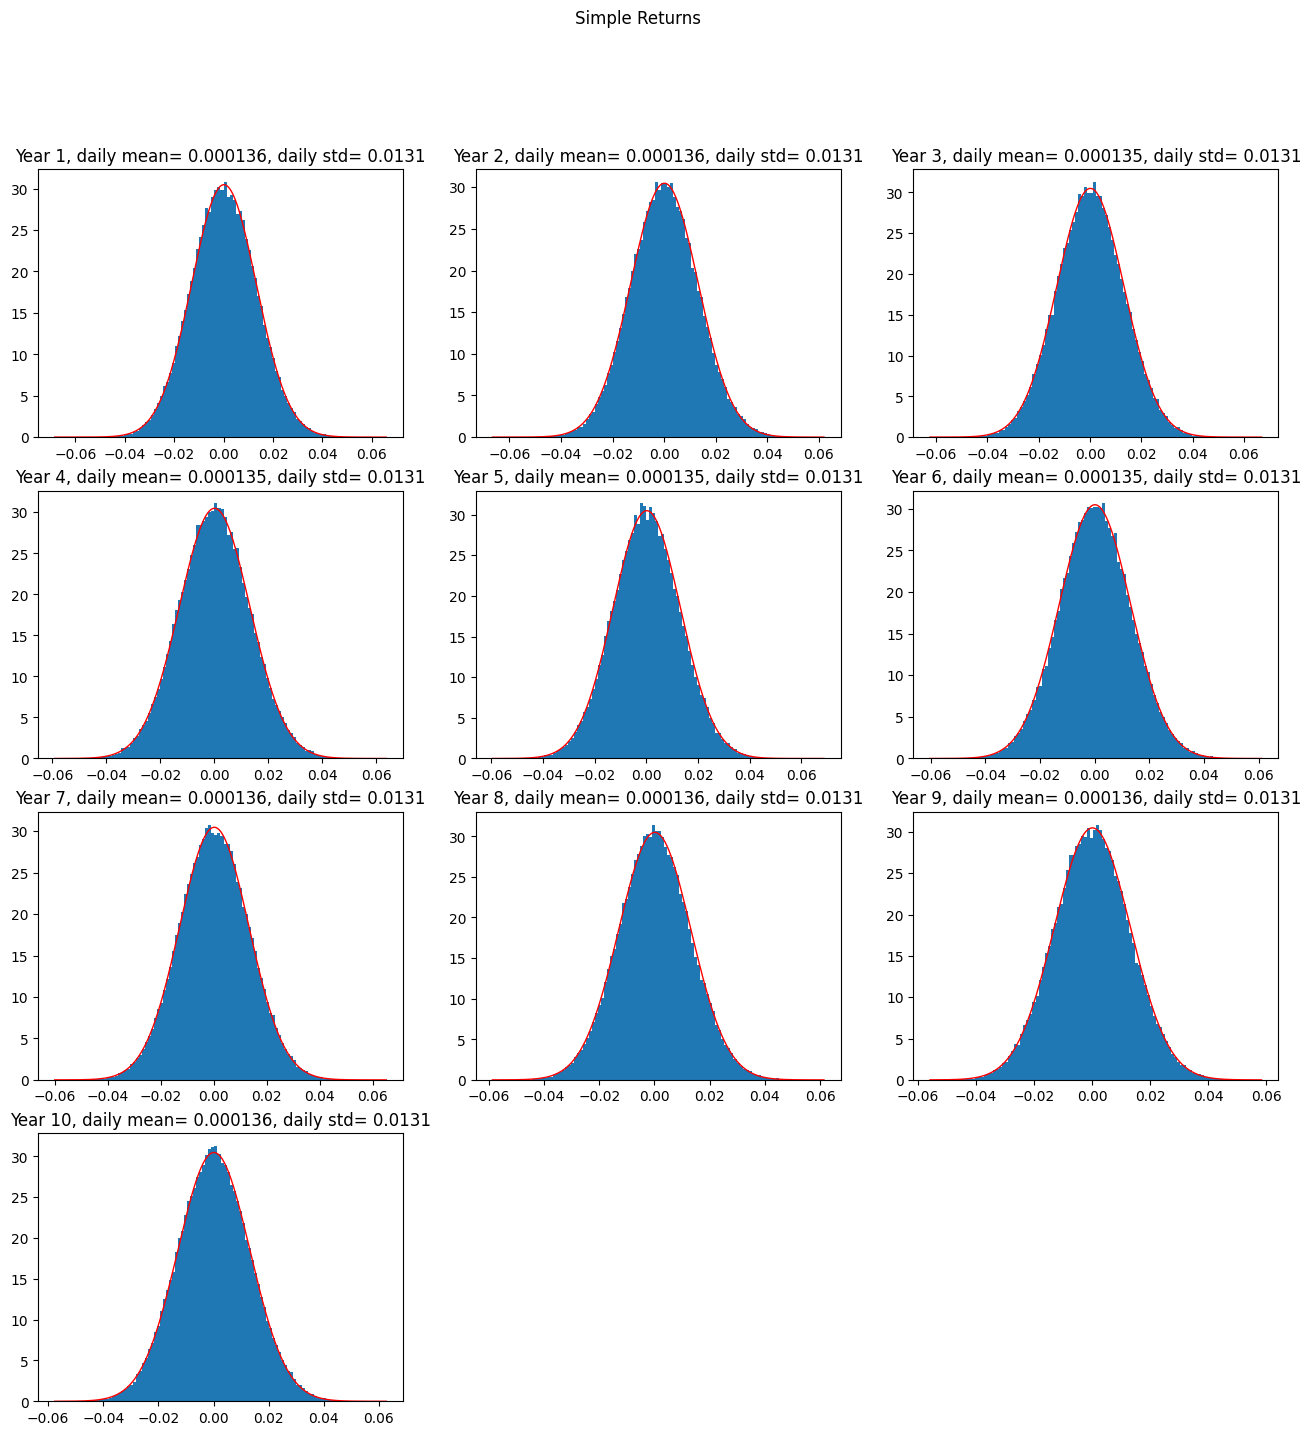

In [25]:
plt.figure(figsize=(16,16))
plt.suptitle("Simple Returns")

# for year 1
plt.subplot(4, 3, 1)
plt.hist(simple_returns[365], bins=100, density=True)       # histogram of simple returns

mean, std = stats.norm.fit(simple_returns[:365,:])          # overlay standard normal, use all returns in all paths
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std), linewidth = 1, color= 'r') 

plt.title(f"Year 1, daily mean= {mean:.6f}, daily std= {std:.4f}")

# for year 2
plt.subplot(4, 3, 2)
plt.hist(simple_returns[730], bins=100, density=True)       # histogram of simple returns

mean, std = stats.norm.fit(simple_returns[:730,:])             # overlay standard normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std), linewidth = 1, color= 'r')  

plt.title(f"Year 2, daily mean= {mean:.6f}, daily std= {std:.4f}")

# for year 3
plt.subplot(4, 3, 3)
plt.hist(simple_returns[1095], bins=100, density=True)      # histogram of simple returns

mean, std = stats.norm.fit(simple_returns[:1095,:])            # overlay standard normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std), linewidth = 1, color= 'r') 

plt.title(f"Year 3, daily mean= {mean:.6f}, daily std= {std:.4f}")

# for year 4
plt.subplot(4, 3, 4)
plt.hist(simple_returns[1460], bins=100, density=True)      # histogram of simple returns

mean, std = stats.norm.fit(simple_returns[:1460,:])        # overlay standard normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std), linewidth = 1, color= 'r') 

plt.title(f"Year 4, daily mean= {mean:.6f}, daily std= {std:.4f}")

# for year 5
plt.subplot(4, 3, 5)
plt.hist(simple_returns[1825], bins=100, density=True)      # histogram of simple returns

mean, std = stats.norm.fit(simple_returns[:1825,:])        # overlay standard normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std), linewidth = 1, color= 'r') 

plt.title(f"Year 5, daily mean= {mean:.6f}, daily std= {std:.4f}")

# for year 6
plt.subplot(4, 3, 6)
plt.hist(simple_returns[2190], bins=100, density=True)     # histogram of simple returns

mean, std = stats.norm.fit(simple_returns[:2190,:])       # overlay standard normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std), linewidth = 1, color= 'r') 

plt.title(f"Year 6, daily mean= {mean:.6f}, daily std= {std:.4f}")

# for year 7
plt.subplot(4, 3, 7)
plt.hist(simple_returns[2555], bins=100, density=True)     # histogram of simple returns

mean, std = stats.norm.fit(simple_returns[:2555,:])           # overlay standard normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std), linewidth = 1, color= 'r') 

plt.title(f"Year 7, daily mean= {mean:.6f}, daily std= {std:.4f}")

# for year 8
plt.subplot(4, 3, 8)
plt.hist(simple_returns[2920], bins=100, density=True)     # histogram of simple returns

mean, std = stats.norm.fit(simple_returns[:2920,:])           # overlay standard normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std), linewidth = 1, color= 'r') 

plt.title(f"Year 8, daily mean= {mean:.6f}, daily std= {std:.4f}")

# for year 9
plt.subplot(4, 3, 9)
plt.hist(simple_returns[3285], bins=100, density=True)     # histogram of simple returns

mean, std = stats.norm.fit(simple_returns[:3285,:])           # overlay standard normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std), linewidth = 1, color= 'r') 

plt.title(f"Year 9, daily mean= {mean:.6f}, daily std= {std:.4f}")

# for year 10
plt.subplot(4, 3, 10)
plt.hist(simple_returns[3649], bins=100, density=True)      # histogram of simple returns

mean, std = stats.norm.fit(simple_returns[:3649,:])        # overlay standard normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std), linewidth = 1, color= 'r') 

plt.title(f"Year 10, daily mean= {mean:.6f}, daily std= {std:.4f}")

plt.show() 

## Log Returns

Log returns are given by 
$$ \large r_{l} = ln(\frac{S_{t}}{S_{t-1}}) $$
They are normally distributed with mean (in this case t = 1/365)
$$ \large \bar{R_{l}} = (\mu - 0.5 \sigma^2)t $$
And Standard Deviation
$$ std = \sigma \sqrt{t} $$

In [26]:
DailyLogR = np.diff(np.log(S), axis=0)
print(DailyLogR.shape)
print(DailyLogR)


(3650, 100000)
[[ 2.55275095e-02  1.48833696e-02 -1.03621347e-02 ...  2.65505049e-03
  -1.97001166e-02  5.60220619e-03]
 [-1.29174303e-02  5.55449895e-03 -1.35816887e-02 ... -1.15831496e-02
   1.21437819e-02 -3.70798182e-03]
 [-8.87552725e-03 -1.45128362e-02  1.87028567e-02 ...  9.74135211e-03
   1.23322927e-02  1.95615054e-02]
 ...
 [-2.37233470e-02 -1.39750202e-02  3.10169880e-02 ...  3.37875560e-03
   8.68155166e-03  2.07872644e-03]
 [-1.21972096e-02 -3.34496579e-03  2.05215169e-07 ... -5.12777661e-03
   6.18377148e-03 -5.27071500e-03]
 [-7.37314080e-03  7.64342569e-03 -1.19013111e-02 ... -7.11362955e-04
   5.87949464e-03 -2.79790110e-03]]


Let's check the mean of these daily log returns (t in this case is 1/365)

In [27]:
print(f"Mean daily log returns (data)= {np.mean(DailyLogR[:,:])}")

# How does this compare with the above formula 

print(f"\nformula of mean log returns=   {(mu - 0.5 * sigma**2)*(1/365)}")

Mean daily log returns (data)= 5.037766529304942e-05

formula of mean log returns=   5.136986301369864e-05


## Annual Statistics of Log Returns

Annual log returns are calculated from daily log returns linearly, $ \bar{R}_{y} = 365 \ \bar{R}_{d} $, and generally $ \bar{R}_{n} = n \ \bar{R}_{d} $, where n = days

To get the annual average standard deviation from the daily standard deviation $ \sigma_{y} = \sigma_{d} \sqrt{365} $

In [28]:
print("\nStats for year 1\n")

print("%14s %14.3f" % ('mean annual log return', 365 * np.mean(DailyLogR[:365,:])))
print("%14s %14.3f" % ('            annual std', np.std(DailyLogR[:365,:]) * np.sqrt(365)))
print("%14s %14.3f" % ('                  Skew', st.skew(DailyLogR[365])))
print("%14s %14.3f" % ('              Kurtosis', st.kurtosis(DailyLogR[365])))

print("\nStats for year 2\n")

print("%14s %14.3f" % ('mean annual log return', 730 * np.mean(DailyLogR[:730,:])))
print("%14s %14.3f" % ('            annual std', np.std(DailyLogR[:730,:]) * np.sqrt(730)))
print("%14s %14.3f" % ('                  Skew', st.skew(DailyLogR[730])))
print("%14s %14.3f" % ('              Kurtosis', st.kurtosis(DailyLogR[730])))

print("\nStats for year 3\n")

print("%14s %14.3f" % ('mean annual log return', 1095 * np.mean(DailyLogR[:1095,:])))
print("%14s %14.3f" % ('            annual std', np.std(DailyLogR[:1095,:]) * np.sqrt(1095)))
print("%14s %14.3f" % ('                  Skew', st.skew(DailyLogR[1095])))
print("%14s %14.3f" % ('              Kurtosis', st.kurtosis(DailyLogR[1095])))

print("\nStats for year 4\n")

print("%14s %14.3f" % ('mean annual log return', 1460 * np.mean(DailyLogR[:1460,:])))
print("%14s %14.3f" % ('            annual std', np.std(DailyLogR[:1460,:]) * np.sqrt(1460)))
print("%14s %14.3f" % ('                  Skew', st.skew(DailyLogR[1460])))
print("%14s %14.3f" % ('              Kurtosis', st.kurtosis(DailyLogR[1460])))

print("\nStats for year 5\n")

print("%14s %14.3f" % ('mean annual log return', 1825 * np.mean(DailyLogR[:1825,:])))
print("%14s %14.3f" % ('            annual std', np.std(DailyLogR[:1825,:]) * np.sqrt(1825)))
print("%14s %14.3f" % ('                  Skew', st.skew(DailyLogR[1825])))
print("%14s %14.3f" % ('              Kurtosis', st.kurtosis(DailyLogR[1825])))

print("\nStats for year 6\n")

print("%14s %14.3f" % ('mean annual log return', 2190 * np.mean(DailyLogR[:2190,:])))
print("%14s %14.3f" % ('            annual std', np.std(DailyLogR[:2190,:]) * np.sqrt(2190)))
print("%14s %14.3f" % ('                  Skew', st.skew(DailyLogR[2190])))
print("%14s %14.3f" % ('              Kurtosis', st.kurtosis(DailyLogR[2190])))

print("\nStats for year 7\n")

print("%14s %14.3f" % ('mean annual log return', 2555 * np.mean(DailyLogR[:2555,:])))
print("%14s %14.3f" % ('            annual std', np.std(DailyLogR[:2555,:]) * np.sqrt(2555)))
print("%14s %14.3f" % ('                  Skew', st.skew(DailyLogR[2555])))
print("%14s %14.3f" % ('              Kurtosis', st.kurtosis(DailyLogR[2555])))

print("\nStats for year 8\n")

print("%14s %14.3f" % ('mean annual log return', 2920 * np.mean(DailyLogR[:2920,:])))
print("%14s %14.3f" % ('            annual std', np.std(DailyLogR[:2920,:]) * np.sqrt(2920)))
print("%14s %14.3f" % ('                  Skew', st.skew(DailyLogR[2920])))
print("%14s %14.3f" % ('              Kurtosis', st.kurtosis(DailyLogR[2920])))

print("\nStats for year 9\n")

print("%14s %14.3f" % ('mean annual log return', 3285 * np.mean(DailyLogR[:3285,:])))
print("%14s %14.3f" % ('            annual std', np.std(DailyLogR[:3285,:]) * np.sqrt(3285)))
print("%14s %14.3f" % ('                  Skew', st.skew(DailyLogR[3285])))
print("%14s %14.3f" % ('              Kurtosis', st.kurtosis(DailyLogR[3285])))

print("\nStats for year 10\n")

print("%14s %14.3f" % ('mean annual log return', 3649 * np.mean(DailyLogR[:3649,:])))
print("%14s %14.3f" % ('            annual std', np.std(DailyLogR[:3649,:]) * np.sqrt(3649)))
print("%14s %14.3f" % ('                  Skew', st.skew(DailyLogR[3649])))
print("%14s %14.3f" % ('              Kurtosis', st.kurtosis(DailyLogR[3649])))


Stats for year 1

mean annual log return          0.018
            annual std          0.250
                  Skew         -0.004
              Kurtosis         -0.008

Stats for year 2

mean annual log return          0.037
            annual std          0.354
                  Skew          0.005
              Kurtosis          0.033

Stats for year 3

mean annual log return          0.055
            annual std          0.433
                  Skew         -0.003
              Kurtosis         -0.028

Stats for year 4

mean annual log return          0.072
            annual std          0.500
                  Skew         -0.008
              Kurtosis          0.016

Stats for year 5

mean annual log return          0.091
            annual std          0.559
                  Skew         -0.007
              Kurtosis          0.001

Stats for year 6

mean annual log return          0.109
            annual std          0.612
                  Skew          0.006
            

## Histogram of Daily Log Returns

Let's plot histograms of log returns with an overlay of standard normal distribution

Text(0.5, 1.0, 'Year 10, mean= 0.000096 std= 0.0131')

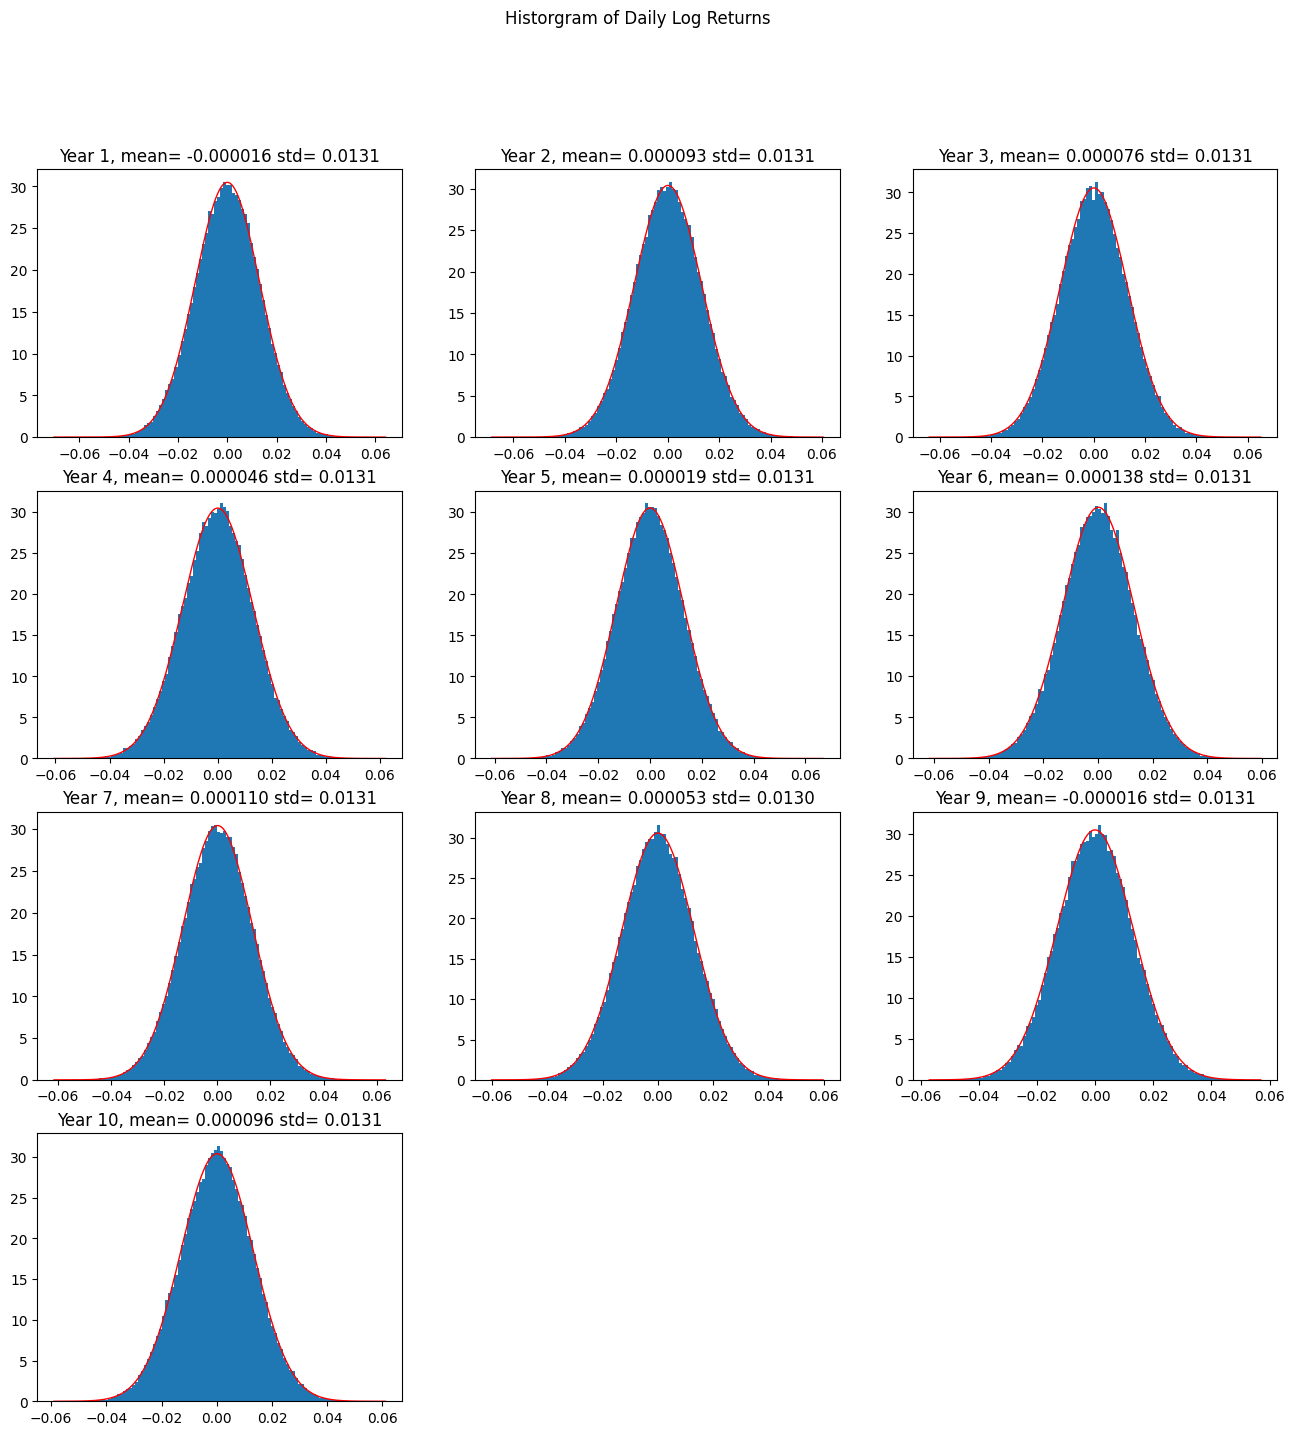

In [29]:
plt.figure(figsize=(16,16))
plt.suptitle('Historgram of Daily Log Returns')

# for year 1
plt.subplot(4, 3, 1)
plt.hist(DailyLogR[365], bins=100, density=True)  # Histogram of log returns

mean, std = stats.norm.fit(DailyLogR[365])        # overlay standard normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std), linewidth = 1, color= 'r') 

plt.title(f"Year 1, mean= {mean:.6f} std= {std:.4f}")

# for year 2
plt.subplot(4, 3, 2)
plt.hist(DailyLogR[730], bins=100, density=True)  # Histogram of log returns

mean, std = stats.norm.fit(DailyLogR[730])        # overlay standard normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std), linewidth = 1, color= 'r')  

plt.title(f"Year 2, mean= {mean:.6f} std= {std:.4f}")

# for year 3
plt.subplot(4, 3, 3)
plt.hist(DailyLogR[1095], bins=100, density=True)  # Histogram of log returns

mean, std = stats.norm.fit(DailyLogR[1095])        # overlay standard normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std), linewidth = 1, color= 'r') 

plt.title(f"Year 3, mean= {mean:.6f} std= {std:.4f}")

# for year 4
plt.subplot(4, 3, 4)
plt.hist(DailyLogR[1460], bins=100, density=True)  # Histogram of log returns

mean, std = stats.norm.fit(DailyLogR[1460])        # overlay standard normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std), linewidth = 1, color= 'r') 

plt.title(f"Year 4, mean= {mean:.6f} std= {std:.4f}")

# for year 5
plt.subplot(4, 3, 5)
plt.hist(DailyLogR[1825], bins=100, density=True)  # Histogram of log returns

mean, std = stats.norm.fit(DailyLogR[1825])        # overlay standard normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std), linewidth = 1, color= 'r') 

plt.title(f"Year 5, mean= {mean:.6f} std= {std:.4f}")

# for year 6
plt.subplot(4, 3, 6)
plt.hist(DailyLogR[2190], bins=100, density=True)  # Histogram of log returns

mean, std = stats.norm.fit(DailyLogR[2190])        # overlay standard normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std), linewidth = 1, color= 'r') 

plt.title(f"Year 6, mean= {mean:.6f} std= {std:.4f}")

# for year 7
plt.subplot(4, 3, 7)
plt.hist(DailyLogR[2555], bins=100, density=True)  # Histogram of log returns

mean, std = stats.norm.fit(DailyLogR[2555])        # overlay standard normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std), linewidth = 1, color= 'r') 

plt.title(f"Year 7, mean= {mean:.6f} std= {std:.4f}")

# for year 8
plt.subplot(4, 3, 8)
plt.hist(DailyLogR[2920], bins=100, density=True)  # Histogram of log returns

mean, std = stats.norm.fit(DailyLogR[2920])        # overlay standard normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std), linewidth = 1, color= 'r') 

plt.title(f"Year 8, mean= {mean:.6f} std= {std:.4f}")

# for year 9
plt.subplot(4, 3, 9)
plt.hist(DailyLogR[3285], bins=100, density=True)   # Histogram of log returns

mean, std = stats.norm.fit(DailyLogR[3285])         # overlay standard normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std), linewidth = 1, color= 'r') 

plt.title(f"Year 9, mean= {mean:.6f} std= {std:.4f}")

# for year 10
plt.subplot(4, 3, 10)
plt.hist(DailyLogR[3649], bins=100, density=True)      # Histogram of log returns

mean, std = stats.norm.fit(DailyLogR[3649])            # overlay standard normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, stats.norm.pdf(x, mean, std), linewidth = 1, color= 'r') 

plt.title(f"Year 10, mean= {mean:.6f} std= {std:.4f}")